# Project Group 3 - Mushroom Dataset
Team Members:

1. Uday Kiran Lakkineni 

2. Srimanth Madira 

3. Prathyusha Mekala

4. Mrunmay Sandeep 

5. Laxman Yadav Musti

# Import Statements

In [10]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestCentroid

# Data Load

In [11]:
def load_data():
    url = "https://archive.ics.uci.edu/static/public/73/data.csv"
    df = pd.read_csv(url)
    
    df['stalk-root'] = df['stalk-root'].astype(str)
    df['stalk-root'] = df['stalk-root'].str.strip()

    df['stalk-root'] = df['stalk-root'].replace('nan', np.nan)

    mode_value = df['stalk-root'].mode()[0]
    df['stalk-root'] = df['stalk-root'].replace(np.nan, mode_value)
    df['stalk-root'] = df['stalk-root'].replace('?', mode_value)

    return df

mushroom_data = load_data()

# Labelling Data Points 

In [12]:
mushroom_data['label'] = mushroom_data['poisonous'].apply(lambda x: 1 if x == 'p' else 0)
mushroom_data = mushroom_data.drop('poisonous', axis=1)

# Probabilistic Classification System

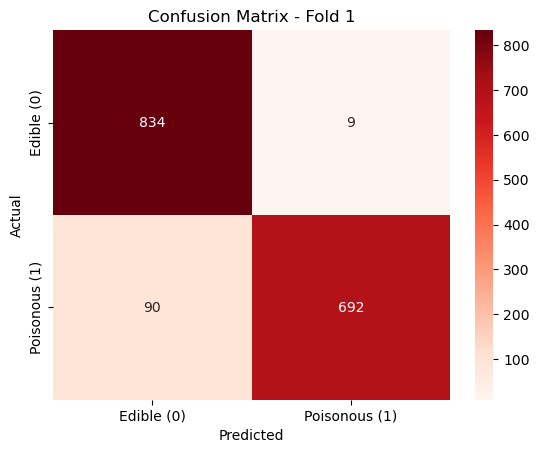

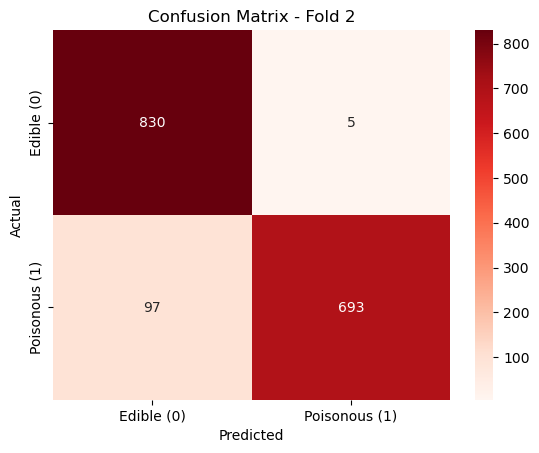

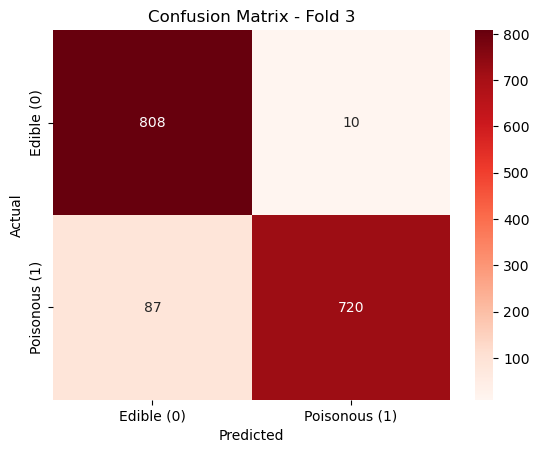

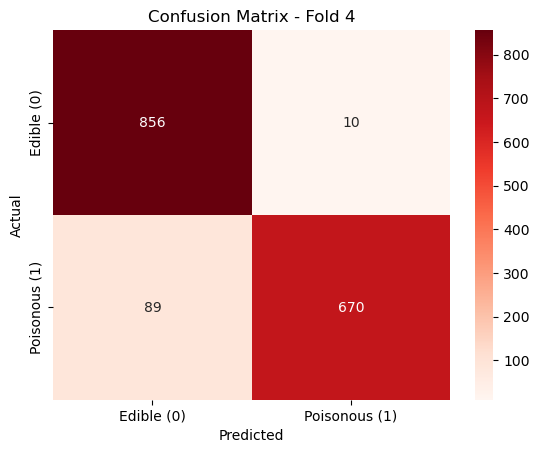

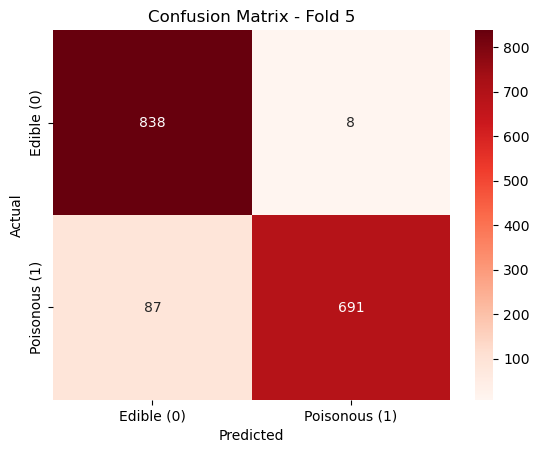

In [13]:
X = mushroom_data.drop('label', axis=1)
y = mushroom_data['label']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

overall_confusion_matrix = [[0, 0], [0, 0]]

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train), columns=encoder.get_feature_names_out(X_train.columns))
    X_test_encoded = pd.DataFrame(encoder.transform(X_test), columns=encoder.get_feature_names_out(X_test.columns))

    nb_classifier = CategoricalNB()
    nb_classifier.fit(X_train_encoded, y_train)

    predictions = nb_classifier.predict(X_test_encoded)

    fold_confusion_matrix = confusion_matrix(y_test, predictions)
    
    sns.heatmap(fold_confusion_matrix, annot=True, fmt="d", cmap="Reds",
                xticklabels=['Edible (0)', 'Poisonous (1)'],
                yticklabels=['Edible (0)', 'Poisonous (1)'])
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    overall_confusion_matrix += fold_confusion_matrix

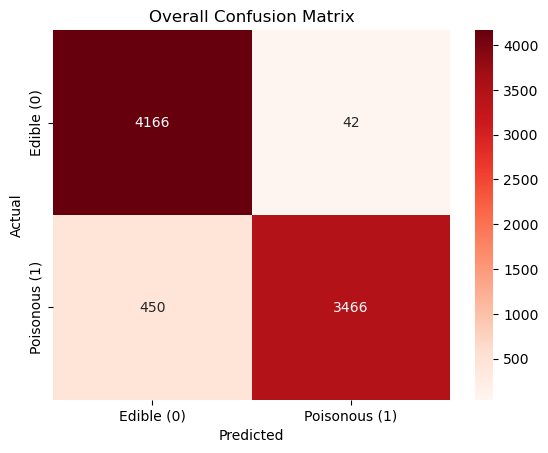

In [14]:
sns.heatmap(overall_confusion_matrix, annot=True, fmt="d", cmap="Reds",
            xticklabels=['Edible (0)', 'Poisonous (1)'],
            yticklabels=['Edible (0)', 'Poisonous (1)'])
plt.title('Overall Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Probability Model
Given our dataset's categorical features representing mushroom characteristics, I opted for Naive Bayes. Its efficiency with categorical data, simplicity, and speed make it a suitable choice for our classification task.

# Data Split Method
We have opted for K-Fold Cross-Validation to split the data in our probabilistic classification model. This method ensures a thorough evaluation by repeatedly training and testing the model on different subsets of the data, enhancing its robustness and generalization.

# Results Explanation
The confusion matrices for each fold and the overall confusion matrix indicate consistent and strong performance of the probabilistic classification model. Across individual folds, the model exhibits balanced precision and recall, consistently identifying true positives and true negatives while maintaining low false positive and false negative rates. The overall performance, reflected in the combined confusion matrix, showcases high accuracy, with 4166 true positives, 3466 true negatives, 42 false positives, and 450 false negatives. This suggests that the model generalizes well and effectively estimates probabilities, demonstrating its reliability in classifying instances.

# Distance Classification System

In [15]:
X = mushroom_data.drop('label', axis=1)
y = mushroom_data['label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X)

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.3, random_state=42)

class_templates = {}
for class_val in np.unique(y_train):
    class_templates[class_val] = X_train[y_train == class_val].mean(axis=0)

predictions = []
for test_point in X_test:
    distances = {class_val: np.linalg.norm(test_point - template) for class_val, template in class_templates.items()}
    predicted_class = min(distances, key=distances.get)  
    predictions.append(predicted_class)

predictions = np.array(predictions)

conf_matrix = confusion_matrix(y_test, predictions)

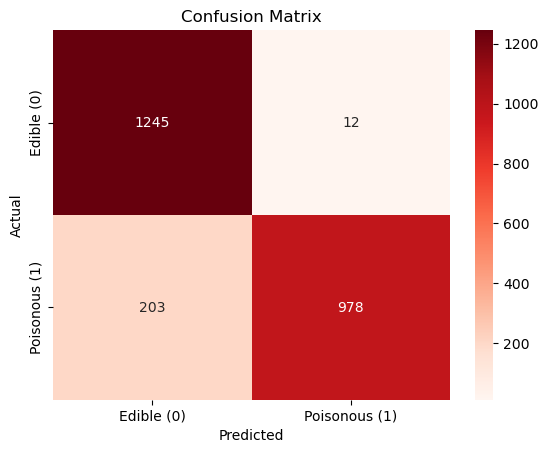

In [16]:
labels = ['Edible (0)', 'Poisonous (1)']

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds",
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# Data Split Method
The 70-30 split in the Euclidean Distance Classifier designates 70% of the data for training the model, allowing it to learn patterns, while reserving 30% for testing to assess its generalization to new, unseen instances. Random shuffling ensures unbiased model training by eliminating any potential influence from the original data order. This approach provides a balanced trade-off between training and evaluation, fostering effective learning and realistic performance assessment.

# Results Explanation
Interpretation:

The high number of true positives (1245) indicates that the classifier is effective in correctly identifying the target class.
The low number of false positives (12) suggests good precision, meaning that when the classifier predicts a positive result, it is usually correct.
The true negatives (978) highlight the model's ability to accurately identify instances not belonging to the target class.
The presence of false negatives (203) indicates instances where the model fails to identify positive cases correctly.

Reasons for Results:

The high true positives and true negatives are indicative of a well-performing classifier with a good balance between sensitivity and specificity.
The low number of false positives contributes to a high precision score, signifying a low rate of false alarms.
The presence of false negatives could be attributed to inherent complexities in the data or potential areas of improvement in the classifier.


# Similarity Classification System

In [17]:
mushroom_data['row_index'] = range(len(mushroom_data))

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(mushroom_data.drop(['label', 'row_index'], axis=1)).toarray()

mushroom_data_sorted = mushroom_data.sort_values(by='row_index')

train_percentage = 0.6

split_index = int(len(mushroom_data_sorted) * train_percentage)

train_data = mushroom_data_sorted.iloc[:split_index]
test_data = mushroom_data_sorted.iloc[split_index:]

# Extract features and labels for train and test sets
X_train = encoder.transform(train_data.drop(['label', 'row_index'], axis=1)).toarray()
y_train = train_data['label']

X_test = encoder.transform(test_data.drop(['label', 'row_index'], axis=1)).toarray()
y_test = test_data['label']

def cosine_similarity(test_instance, training_data):
    similarity = np.dot(training_data, test_instance.T) / (np.linalg.norm(training_data, axis=1)[:, None] * np.linalg.norm(test_instance))
    return similarity

def classify_with_cosine_similarity(test_instance, training_data, y_train):
    similarities = cosine_similarity(test_instance, training_data)
    most_similar_index = np.argmax(similarities, axis=0)
    predicted_labels = y_train.iloc[most_similar_index]
    return predicted_labels

cosine_similarity_matrix = cosine_similarity(X_test, X_train)

predictions_cosine = classify_with_cosine_similarity(X_test, X_train, y_train)

conf_matrix_cosine = confusion_matrix(y_test, predictions_cosine)

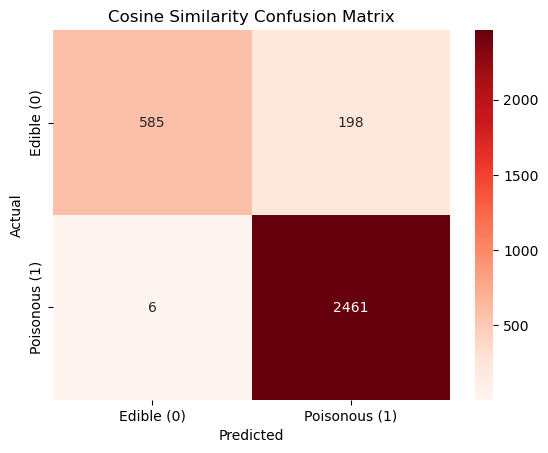

In [18]:
labels = ['Edible (0)', 'Poisonous (1)']

sns.heatmap(conf_matrix_cosine, annot=True, fmt="d", cmap="Reds",
            xticklabels=labels, yticklabels=labels)

plt.title('Cosine Similarity Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Data Split Method
Time-based split is suitable for the cosine similarity approach in this context because it helps to preserve the temporal order of the data, which is crucial for the cosine similarity calculation. Cosine similarity relies on the similarity between vectors, and the order of instances can significantly impact the results.

# Results Explanation
The Cosine Similarity classifier exhibits excellent performance, with a precision of 92.5%, indicating a low rate of false positives. The high recall of 99.7% emphasizes the model's ability to effectively identify poisonous mushrooms while minimizing the risk of false negatives. The overall accuracy of 93.4% underscores the model's proficiency in correctly classifying mushrooms as either edible or poisonous.

The F1 score, which balances precision and recall, is 96.0%, further affirming the model's effectiveness. These metrics collectively suggest that the Cosine Similarity classifier is a robust and reliable tool for distinguishing between edible and poisonous mushrooms. The few false positives should be considered in the context of the specific use case, with potential adjustments or fine-tuning depending on the associated risks.